<h1 style="text-align: center; font-family: 'Lucida Console', 'Courier New', monospace;">Singapore HDB Flat Resale Prices (2017-2020)</h1>

<img src="https://i.ibb.co/rw6XmCG/peter-nguyen-singapore.jpg" alt="peter-nguyen-singapore-image" border="0">

<h3 style="font-family: 'Lucida Console', 'Courier New', monospace;">Data Preparation</h3>

In [197]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv', 
                 parse_dates=['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                80374 non-null  datetime64[ns]
 1   town                 80374 non-null  object        
 2   flat_type            80374 non-null  object        
 3   block                80374 non-null  object        
 4   street_name          80374 non-null  object        
 5   storey_range         80374 non-null  object        
 6   floor_area_sqm       80374 non-null  float64       
 7   flat_model           80374 non-null  object        
 8   lease_commence_date  80374 non-null  int64         
 9   remaining_lease      80374 non-null  object        
 10  resale_price         80374 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 6.7+ MB


In [169]:
df.shape

(80374, 11)

In [170]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,80374.000000,80374.000000,8.037400e+04
mean,97.617804,1994.117501,4.393165e+05
std,24.285811,12.839267,1.533902e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


In [171]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [172]:
df.iloc[10000:10006]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
10000,2017-07-01,BUKIT BATOK,4 ROOM,289G,BT BATOK ST 25,04 TO 06,102.0,Model A,1998,80 years,450000.0
10001,2017-07-01,BUKIT BATOK,4 ROOM,395,BT BATOK WEST AVE 5,19 TO 21,92.0,Model A,2004,86 years 02 months,460000.0
10002,2017-07-01,BUKIT BATOK,4 ROOM,384,BT BATOK WEST AVE 5,10 TO 12,92.0,Model A,2005,86 years 06 months,465000.0
10003,2017-07-01,BUKIT BATOK,4 ROOM,621,BT BATOK CTRL,25 TO 27,90.0,Model A,2003,85 years 04 months,570000.0
10004,2017-07-01,BUKIT BATOK,5 ROOM,387,BT BATOK WEST AVE 5,01 TO 03,118.0,Improved,2004,86 years 04 months,479000.0
10005,2017-07-01,BUKIT BATOK,5 ROOM,392,BT BATOK WEST AVE 5,01 TO 03,118.0,Improved,2004,86 years 03 months,485000.0


In [173]:
df[df['resale_price'] == df['resale_price'].max()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
78480,2020-09-01,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,89 years 04 months,1258000.0


<h3 style="font-family: 'Lucida Console', 'Courier New', monospace;">Data Manipulation and Analysis</h3>

In [174]:
all_flat_types = sorted(np.array(df['flat_type'].unique()))
print(all_flat_types)

['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']


In [175]:
df['flat_type'].value_counts()

4 ROOM              33282
5 ROOM              19947
3 ROOM              19420
EXECUTIVE            6411
2 ROOM               1240
1 ROOM                 37
MULTI-GENERATION       37
Name: flat_type, dtype: int64

<AxesSubplot:xlabel='flat_type', ylabel='count'>

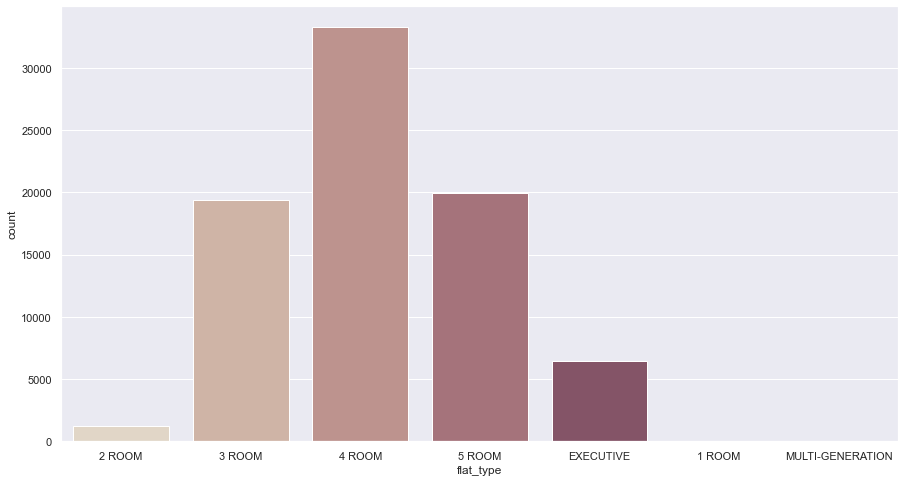

In [176]:
# sns.set(rc = {'figure.figsize':(15, 8)})
sns.countplot(x="flat_type", palette="ch:.25", data=df)

In [177]:
all_flat_models = sorted(np.array(df['flat_model'].unique()))
print(all_flat_models)

['2-room', 'Adjoined flat', 'Apartment', 'DBSS', 'Improved', 'Improved-Maisonette', 'Maisonette', 'Model A', 'Model A-Maisonette', 'Model A2', 'Multi Generation', 'New Generation', 'Premium Apartment', 'Premium Apartment Loft', 'Premium Maisonette', 'Simplified', 'Standard', 'Terrace', 'Type S1', 'Type S2']


In [178]:
df['flat_model'].value_counts()

Model A                   26288
Improved                  20067
New Generation            11061
Premium Apartment          8689
Simplified                 3368
Apartment                  3257
Maisonette                 2376
Standard                   2260
DBSS                       1332
Model A2                   1045
Adjoined flat               152
Model A-Maisonette          136
Type S1                     134
Type S2                      74
Terrace                      46
Multi Generation             37
Premium Apartment Loft       26
Improved-Maisonette          14
Premium Maisonette           10
2-room                        2
Name: flat_model, dtype: int64

<AxesSubplot:xlabel='count', ylabel='flat_model'>

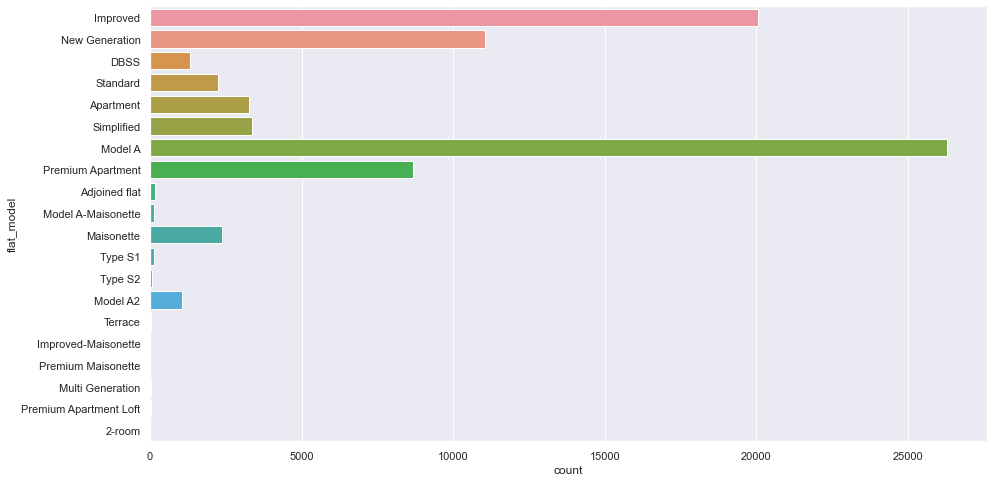

In [179]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y='flat_model', data=df)

In [180]:
sorted(df['storey_range'].unique())

['01 TO 03',
 '04 TO 06',
 '07 TO 09',
 '10 TO 12',
 '13 TO 15',
 '16 TO 18',
 '19 TO 21',
 '22 TO 24',
 '25 TO 27',
 '28 TO 30',
 '31 TO 33',
 '34 TO 36',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

<AxesSubplot:xlabel='count', ylabel='storey_range'>

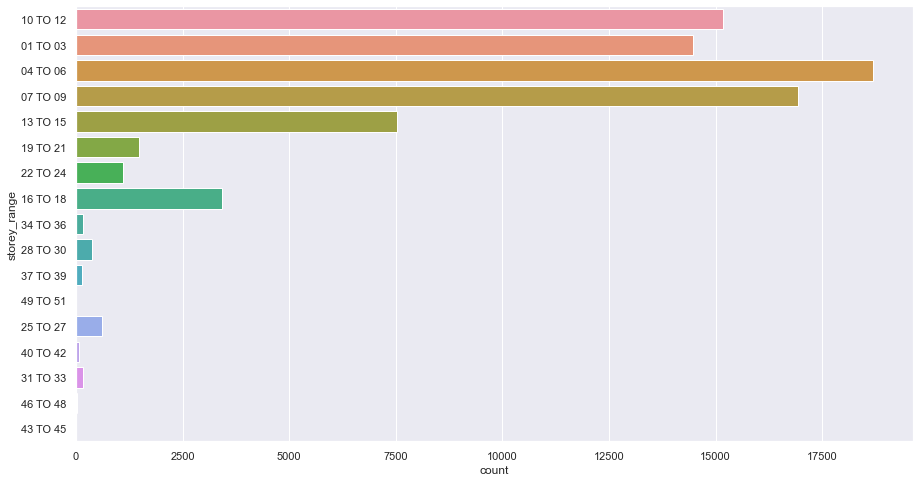

In [181]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y='storey_range', data=df)

In [182]:
df['resale_price'].describe()

count    8.037400e+04
mean     4.393165e+05
std      1.533902e+05
min      1.400000e+05
25%      3.300000e+05
50%      4.100000e+05
75%      5.150000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

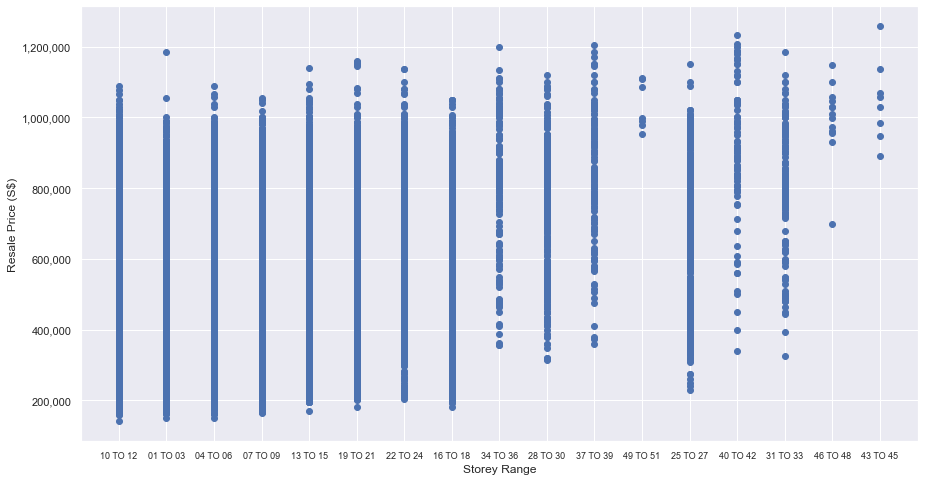

In [183]:
fig, ax = plt.subplots()
ax.scatter(df['storey_range'], df['resale_price'])
ax.set_xlabel('Storey Range')
ax.set_ylabel('Resale Price (S$)')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=9)
plt.show()

In [184]:
df[df['storey_range'] == '43 TO 45']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
6504,2017-05-01,CENTRAL AREA,5 ROOM,1F,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,92 years 08 months,1058000.0
17418,2017-11-01,CENTRAL AREA,4 ROOM,1D,CANTONMENT RD,43 TO 45,96.0,Type S1,2011,92 years 02 months,948000.0
17420,2017-11-01,CENTRAL AREA,5 ROOM,1E,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,92 years 02 months,1138000.0
28714,2018-06-01,CENTRAL AREA,4 ROOM,1F,CANTONMENT RD,43 TO 45,94.0,Type S1,2011,91 years 07 months,985000.0
48995,2019-05-01,CENTRAL AREA,4 ROOM,1B,CANTONMENT RD,43 TO 45,93.0,Type S1,2011,90 years 09 months,1030000.0
60922,2019-11-01,CENTRAL AREA,4 ROOM,1F,CANTONMENT RD,43 TO 45,95.0,Type S1,2011,90 years 02 months,1068000.0
78480,2020-09-01,CENTRAL AREA,5 ROOM,1B,CANTONMENT RD,43 TO 45,107.0,Type S2,2011,89 years 04 months,1258000.0
79436,2020-09-01,QUEENSTOWN,4 ROOM,86,DAWSON RD,43 TO 45,87.0,Premium Apartment,2016,95 years,890000.0


In [185]:
df.groupby(['town', 'flat_model'])['flat_model'].count()

town        flat_model       
ANG MO KIO  Adjoined flat          34
            Apartment              21
            DBSS                  181
            Improved              463
            Maisonette              4
                                 ... 
YISHUN      Model A              2254
            Multi Generation       21
            New Generation       1056
            Premium Apartment      61
            Simplified           1006
Name: flat_model, Length: 224, dtype: int64

In [186]:
grouped = df.groupby('town')
grouped.filter(lambda x: x['resale_price'].mean() > 710000.0)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
296,2017-01-01,BUKIT TIMAH,4 ROOM,4,TOH YI DR,07 TO 09,104.0,Model A,1988,70 years 07 months,670000.0
297,2017-01-01,BUKIT TIMAH,5 ROOM,5,FARRER RD,10 TO 12,120.0,Standard,1974,56 years 03 months,890000.0
298,2017-01-01,BUKIT TIMAH,EXECUTIVE,15,TOH YI DR,01 TO 03,146.0,Maisonette,1988,70 years 06 months,876888.0
1427,2017-02-01,BUKIT TIMAH,3 ROOM,4,QUEEN'S RD,07 TO 09,74.0,Improved,1974,56 years 02 months,425000.0
1428,2017-02-01,BUKIT TIMAH,5 ROOM,17,TOH YI DR,01 TO 03,122.0,Improved,1988,70 years 05 months,710000.0
...,...,...,...,...,...,...,...,...,...,...,...
78455,2020-09-01,BUKIT TIMAH,4 ROOM,2,QUEEN'S RD,04 TO 06,89.0,Improved,1974,52 years 07 months,575000.0
78456,2020-09-01,BUKIT TIMAH,4 ROOM,16,TOH YI DR,04 TO 06,104.0,Model A,1988,67 years 03 months,620000.0
78457,2020-09-01,BUKIT TIMAH,4 ROOM,1,TOH YI DR,01 TO 03,104.0,Model A,1988,66 years 10 months,620000.0
78458,2020-09-01,BUKIT TIMAH,4 ROOM,14,TOH YI DR,04 TO 06,104.0,Model A,1988,67 years 01 month,625000.0


In [187]:
high_avg_resale = df.groupby('town')['resale_price'].agg(['mean'])
high_avg_resale.sort_values(by='mean', ascending=False)

,mean
town,
BUKIT TIMAH,711565.245455
BISHAN,641257.113355
CENTRAL AREA,617038.942249
BUKIT MERAH,562568.517882
QUEENSTOWN,558724.515308
MARINE PARADE,508642.227957
PASIR RIS,492510.592317
KALLANG/WHAMPOA,492476.357310
SERANGOON,489768.104310


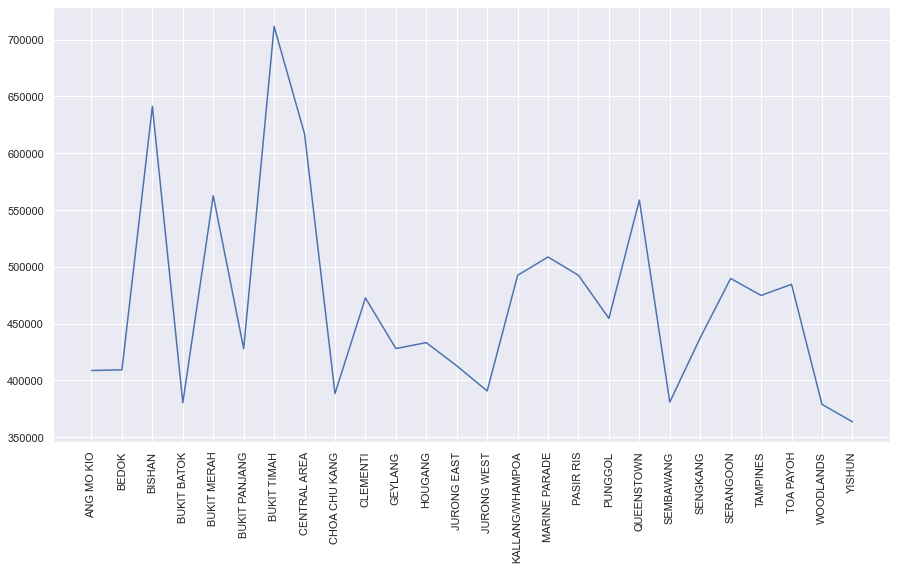

In [188]:
fig, ax = plt.subplots()
ax.plot(high_avg_resale.index, high_avg_resale['mean'])
plt.xticks(rotation=90)
plt.show()

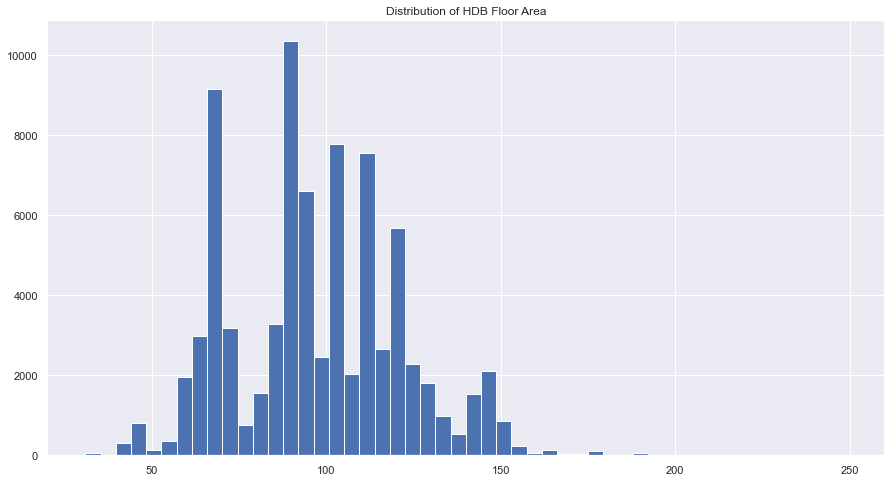

Apartment             423
Maisonette            399
Adjoined flat          46
Multi Generation       32
Model A-Maisonette      9
Terrace                 8
Model A                 3
Premium Maisonette      3
Name: flat_model, dtype: int64

In [189]:
plt.hist(df['floor_area_sqm'], bins=50)
plt.title('Distribution of HDB Floor Area')
plt.show()
display(df[df['floor_area_sqm'] > 150]['flat_model'].value_counts())

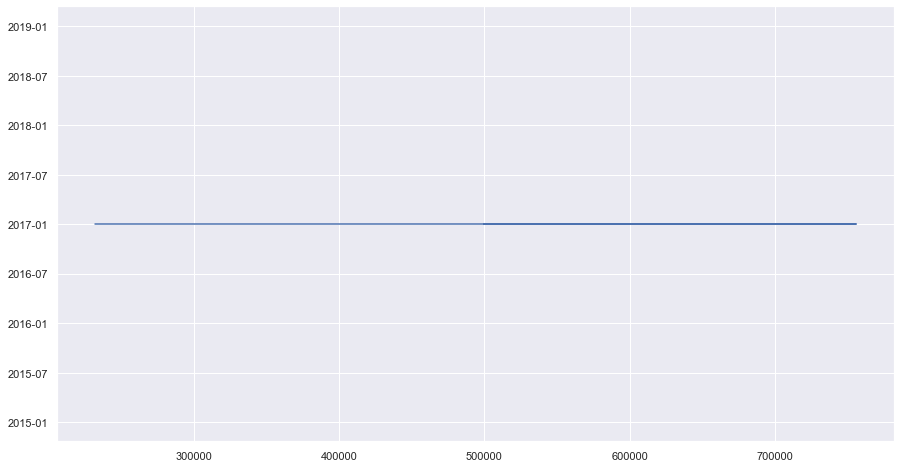

In [190]:
df2 = df.head(50)
fig, ax = plt.subplots()
ax.plot(df2['resale_price'], df2['month'])
plt.show()

In [191]:
df_flats = df.groupby(['town'])['flat_type'].agg(['count'])
df_flats

,count
town,
ANG MO KIO,3613
BEDOK,4356
BISHAN,1535
BUKIT BATOK,2953
BUKIT MERAH,3097
BUKIT PANJANG,3197
BUKIT TIMAH,220
CENTRAL AREA,658
CHOA CHU KANG,3333


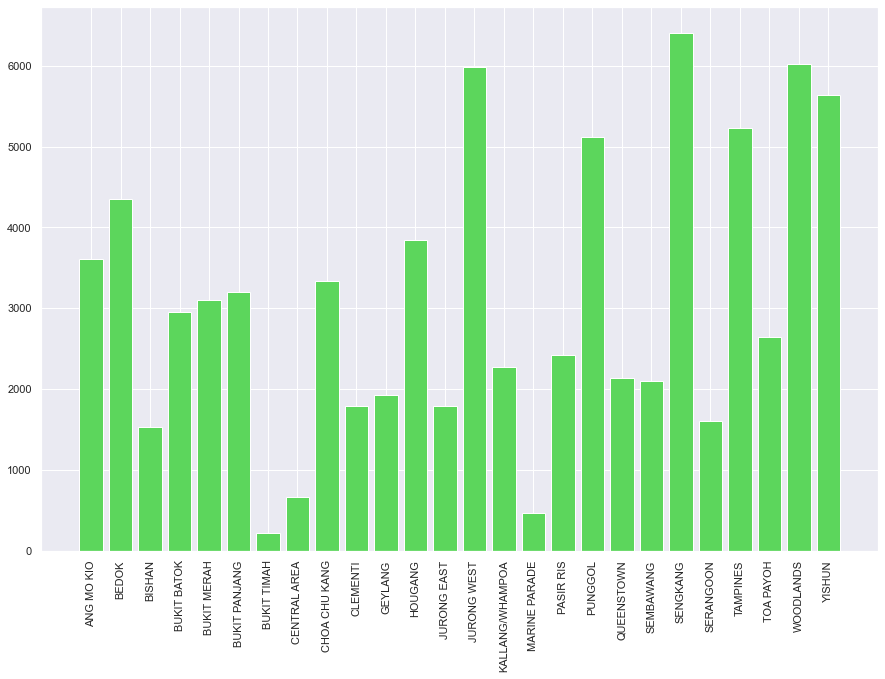

In [192]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.bar(df_flats.index, df_flats['count'], color='#5cd65c')
plt.xticks(rotation=90)
plt.show()

In [193]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,80374.000000,80374.000000,8.037400e+04
mean,97.617804,1994.117501,4.393165e+05
std,24.285811,12.839267,1.533902e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1994.000000,4.100000e+05
75%,113.000000,2003.000000,5.150000e+05
max,249.000000,2019.000000,1.258000e+06


In [194]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='town'>

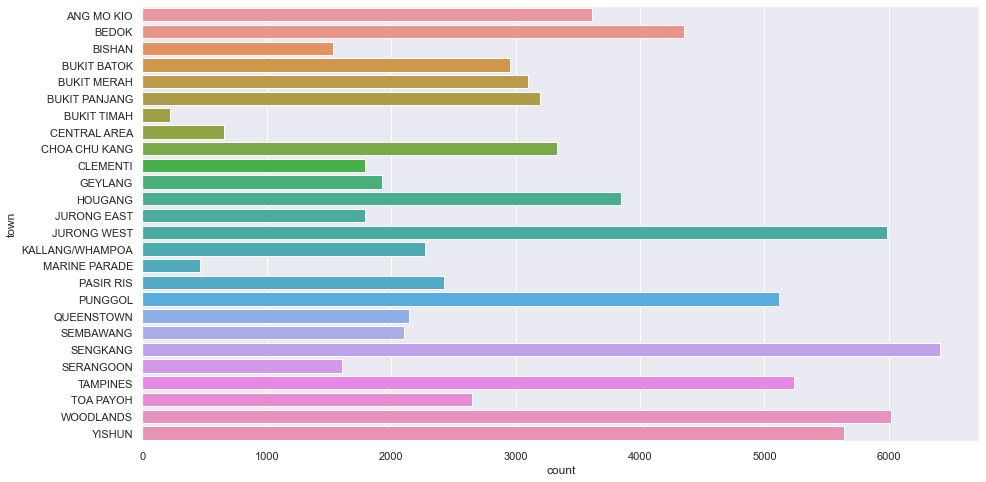

In [195]:
sns.countplot(y='town', data=df)

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'floor_area_sqm'}>],
       [<AxesSubplot:title={'center':'lease_commence_date'}>,
        <AxesSubplot:title={'center':'resale_price'}>]], dtype=object)

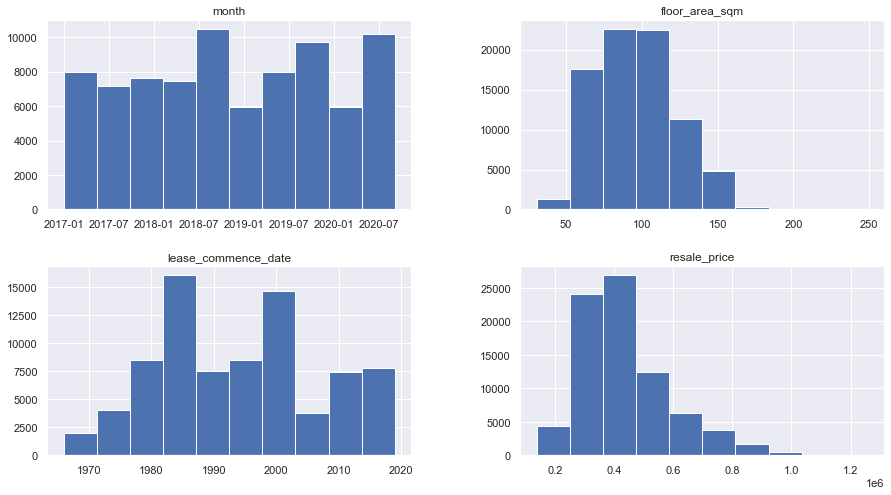

In [196]:
df.hist()